#                                       Titanic 数据分析项目

##                      分析目标：找出让船上的人生还率更高的因素

In [2]:
# 导入所需要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodecsv
import seaborn as sns

In [3]:
# 利用pandas库导入数据集
titanic_df=pd.read_csv('titanic-data.csv')

In [4]:
#查看前10条数据集记录
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


查阅 [Kaggle 网站](https://www.kaggle.com/c/titanic/data)同时结合打印出的数据，得知每个字段名的含义 <br/>
PassengerId             乘客ID<br/>
Survived             是否生还(0为未生还 1为生还)<br/>
Pclass               票类（1/2/3级，代表经济地位）<br/>
Name                 姓名<br/>
Sex                  性别<br/>
Age                  年龄<br/>
SibSP                船上兄弟与姐妹的个数<br/>
Parch                船上父母与小孩的个数<br/>
Ticket               船票号<br/>
Fare                 票价<br/>
Cabin                客舱号<br/>
Embarked             登船港口（C = Cherbourg, Q = Queenstown, S = Southampton）<br/>

个人主观臆断，觉得Pclass，Sex，Age，Parch这几个因素对生还率影响较大，做主要分析。

In [5]:
#使用describe()函数对数据集进行快速统计汇总
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


观察统计汇总后发现：
1、乘客生还率约为38.38%，平均年龄约为29.70，船上人均父母小孩数约为0.38个，票的级别平均约为2.31级。
2、Age（年龄）字段数据不完整，缺少177个数据。

In [8]:
#对Age（年龄）数据进行处理。假设乘客年龄分布服从均值为29.70，标准差为14.53的正态分布函数。
#导入random库
import random
#标准差为14.53
std = 14.53
#由Age平均值
passenger_age_mean = 29.70
titanic_df['Age'].fillna(round(random.gauss(passenger_age_mean, std), 0),inplace=True)

In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 一、分析年龄对生还率的影响

Populating the interactive namespace from numpy and matplotlib


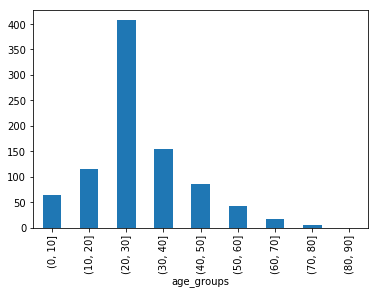

In [59]:
#对年龄进行分组，每10岁一组
%pylab inline
bins = np.arange(0, 100, 10)
titanic_df['age_groups'] = pd.cut(titanic_df['Age'], bins)
# 统计各年龄段总人数并做直方图
age_group_members = titanic_df.groupby('age_groups')['PassengerId'].count()
age_group_members.plot(kind = 'bar')

由上图，可知船上20-30岁的游客最多，60岁以上的游客较少，而且船上没有大于80岁的游客。

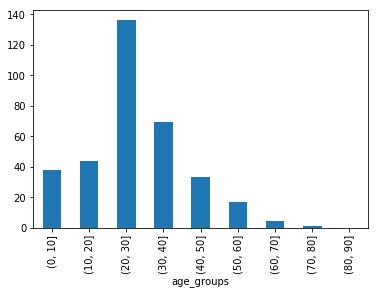

In [64]:
# 统计各年龄段生存人数并做直方图
survive_age_members = titanic_df.groupby('age_groups').sum()['Survived']
survive_age_members.plot(kind = 'bar')

由上图，船上幸存的游客的年龄分布图，大体上与游客总体年龄分布图的形状相近。

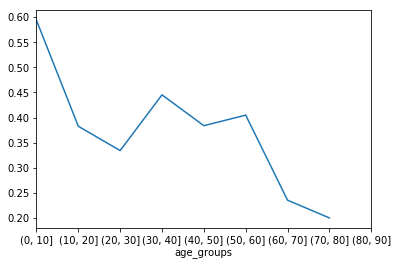

In [65]:
#计算各年龄段幸存人数占其对应年龄段的比例
(survive_age_members / age_group_members).plot()

由上图，0-10岁年龄段，幸存比例最高，60岁以上幸存比例较低，其他年龄段幸存比例相差不大，但相比之下，30-40岁幸存比例略高。

## 二、分析性别对生还率的影响

In [66]:
# 计算男性总人数与女性总人数
sex_group_members = titanic_df.groupby('Sex').count()['PassengerId']

In [67]:
# 计算男性、女性幸存人数
sex_survive_members = titanic_df.groupby('Sex').sum()['Survived']

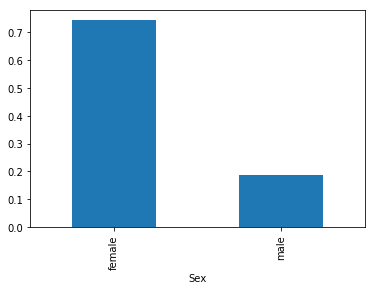

In [69]:
# 计算男性幸存比例与女性幸存比例
(sex_survive_members / sex_group_members).plot(kind = 'bar')

由上图，女性幸存比例远高于男性。

## 三、Pclass对幸存者的影响

In [71]:
# 计算Pclass分别为1，2, 3，三种类别各自总人数
Pclass_group_members = titanic_df.groupby('Pclass').count()['PassengerId']
titanic_df.groupby('Pclass').count()['PassengerId']

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [73]:
# 计算Pclass分别为1，2, 3，三种类别各自幸存人数
Pclass_survive_members = titanic_df.groupby('Pclass').sum()['Survived']
titanic_df.groupby('Pclass').sum()['Survived']

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

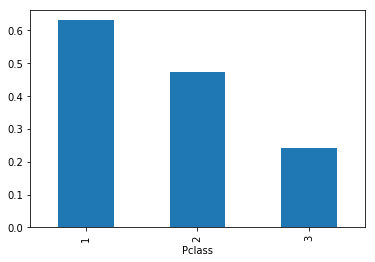

In [74]:
(Pclass_survive_members / Pclass_group_members).plot(kind = 'bar')

查阅 [Kaggle 网站](https://www.kaggle.com/c/titanic/data)，1代表上层阶级，2代表中层阶级，3代表下层阶级。由上图，可知，身份阶级越高，幸存几率越大。

## 四、Parch变量与Survive变量的相关性

In [78]:
# 定义相关性函数
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()
correlation(titanic_df['Parch'], titanic_df['Survived'])

0.081629407083483485

表明有老人或孩子在船上时，生还率也会提高。但两者相关性值很小，表明两者间的相关度不高。

# 五、 双变量分析生存率（身份地位与性别）

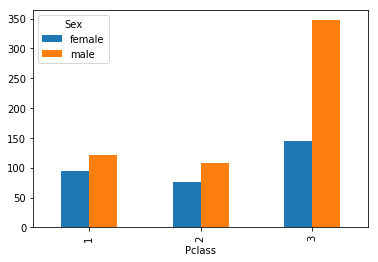

In [99]:
# 船上3种阶级身份的男女数目
class_sex_members = titanic_df.groupby(['Pclass','Sex'])['PassengerId'].count().unstack()
class_sex_members.plot(kind = 'bar')

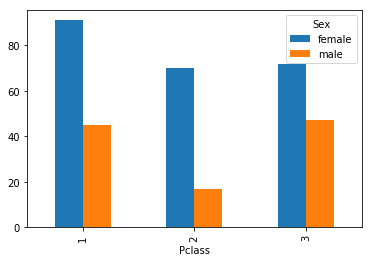

In [100]:
# 船上3种阶级身份的男女生存人数
class_sex_survivers = titanic_df.groupby(['Pclass','Sex'])['Survived'].sum().unstack()
class_sex_survivers.plot(kind = 'bar')

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


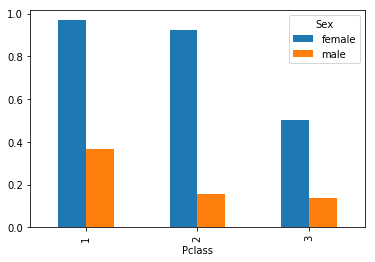

In [104]:
# 对应幸存率
( class_sex_survivers / class_sex_members).plot(kind = 'bar')
print class_sex_survivers / class_sex_members

从上图可以看出，在幸存者当中，身份为上层阶级或中层阶级的女性，生存率特别高，分别高达96.8% 与 92.1%，而男性幸存率相比要低很多，彰显了船上男性
的绅士风度。同时身份为下层阶级的游客，男女的生还率都较低，也反映了当时存在一定的阶级性观念。

## 六、结论

通过分析，影响生还率的最大因素为性别，其次[0-10岁]小孩的生存率也很高，上层阶级与中层阶级相比下层阶级，生存率也高很多。